# Ways to Visualize Top Count With Atoti

Given different categories of items, we will explore how to achieve the following with Atoti:

* Visualize top 10 apps with the highest rating in table.
* Visualize top 10 categories with most number of apps rated 5 in Pie chart.
* Visualize top 10 apps for each category in subplots.

See [pandas.ipynb](pandas.ipynb) to see how we can achieve the similar top count with Pandas.

💡 **Note:** We are using the [Google Play Store Apps data](https://www.kaggle.com/lava18/google-play-store-apps) from Kaggle. Data has been processed to convert strings with millions and thousands abbreviations into numeric data.

<div style="text-align:center"><a href="https://www.atoti.io/?utm_source=gallery&utm_content=top-count-atoti" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/Discover-Atoti-now.png" alt="Atoti table" /></a></div>

## Top count with Atoti

In [1]:
import atoti as tt

session = tt.Session(user_content_storage="./content", port=55707)

In [2]:
playstore = session.read_csv(
    "s3://data.atoti.io/notebooks/topcount/googleplaystore_cleaned.csv",
    table_name="playstore",
    keys=["App", "Category", "Genres", "Current Ver"],
    types={"Reviews": tt.type.FLOAT, "Installs": tt.type.FLOAT},
    process_quotes=True,
)

playstore.head()

,,,,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver
App,Category,Genres,Current Ver,,,,,,,,,
Weather forecast,WEATHER,Weather,1.11.93,4.8,159455.0,10000000.0,1000000.0,Free,0.0,Everyone,"May 8, 2018",4.4 and up
myQ,TOOLS,Tools,3.2.0,3.6,3642.0,29000000.0,100000.0,Free,0.0,Everyone,"July 23, 2018",4.0.3 and up
SportLook,PHOTOGRAPHY,Photography,1.2.7,2.5,1283.0,8200000.0,100000.0,Free,0.0,Everyone,"June 21, 2018",4.1 and up
DV-4036 by Somikon,PHOTOGRAPHY,Photography,0.0.5,<NA>,17.0,44000000.0,1000.0,Free,0.0,Everyone,"January 19, 2017",4.3 and up
Klara weather,WEATHER,Weather,1.3.6,4.6,36900.0,4800000.0,500000.0,Free,0.0,Everyone,"July 28, 2018",4.0 and up


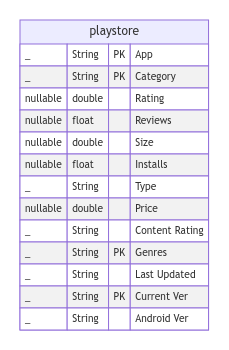

In [3]:
cube = session.create_cube(playstore, "Google Playstore")
session.tables.schema

### Top 10 apps with highest rating across categories

Use the content editor to apply a top count filter on the pivot table.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
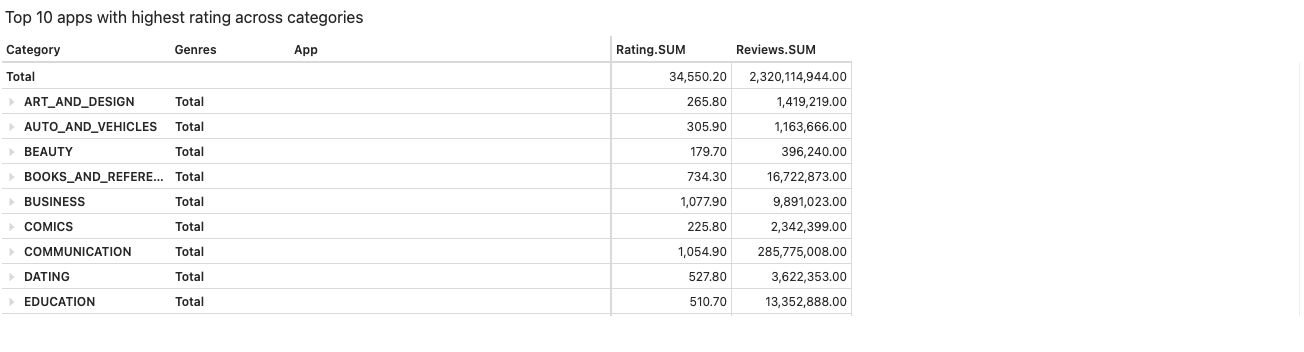

In [4]:
session.widget

### Top 10 categories with the most number of apps rated 5

In [5]:
h, l, m = cube.hierarchies, cube.levels, cube.measures
m

{'contributors.COUNT': <atoti.measure.Measure object at 0x13e86b1c0>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x13e90fee0>, 'Size.SUM': <atoti.measure.Measure object at 0x13e90ff10>, 'Size.MEAN': <atoti.measure.Measure object at 0x13e90ff40>, 'Reviews.SUM': <atoti.measure.Measure object at 0x13e90ff70>, 'Reviews.MEAN': <atoti.measure.Measure object at 0x13e90ffa0>, 'Installs.SUM': <atoti.measure.Measure object at 0x13e90ffd0>, 'Installs.MEAN': <atoti.measure.Measure object at 0x13e990040>, 'Rating.SUM': <atoti.measure.Measure object at 0x13e990070>, 'Rating.MEAN': <atoti.measure.Measure object at 0x13e9900a0>, 'Price.SUM': <atoti.measure.Measure object at 0x13e9900d0>, 'Price.MEAN': <atoti.measure.Measure object at 0x13e990100>}

#### Number of apps rated 5

Create a measure that counts the number of apps rated 5 within categories and at levels below the category.

In [6]:
m["Count with rating 5"] = tt.agg.sum(
    tt.where(m["Rating.MEAN"] == 5, m["contributors.COUNT"], 0),
    scope=tt.OriginScope(levels={l["Category"], l["App"]}),
)

We can drill down to different levels from category and the count is computed on the fly.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
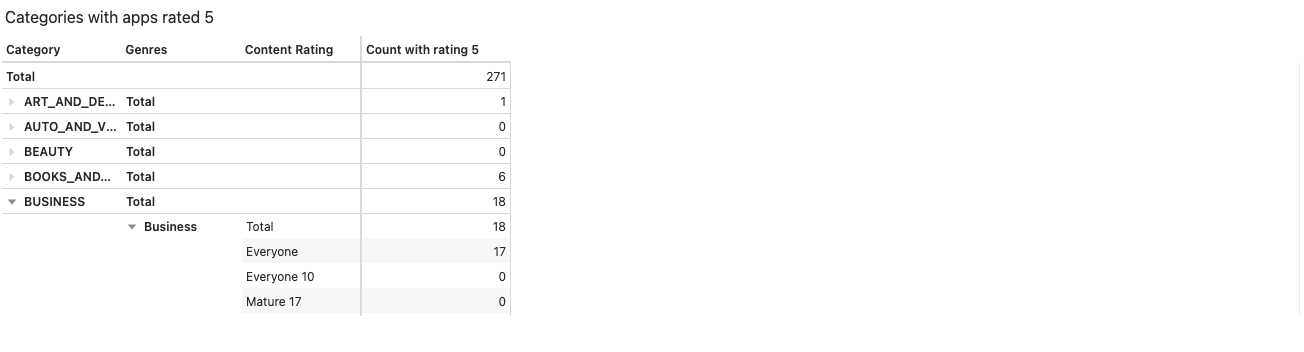

In [7]:
session.widget

Apply top count filter from **Atoti editor** on the category by the `Count with rating 5` measure. The Atoti editor is the Atoti's Jupyterlab extension on the right with the <img src="https://data.atoti.io/notebooks/topcount/Atoti-extension-logo.png" alt="a." width="25"> icon.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
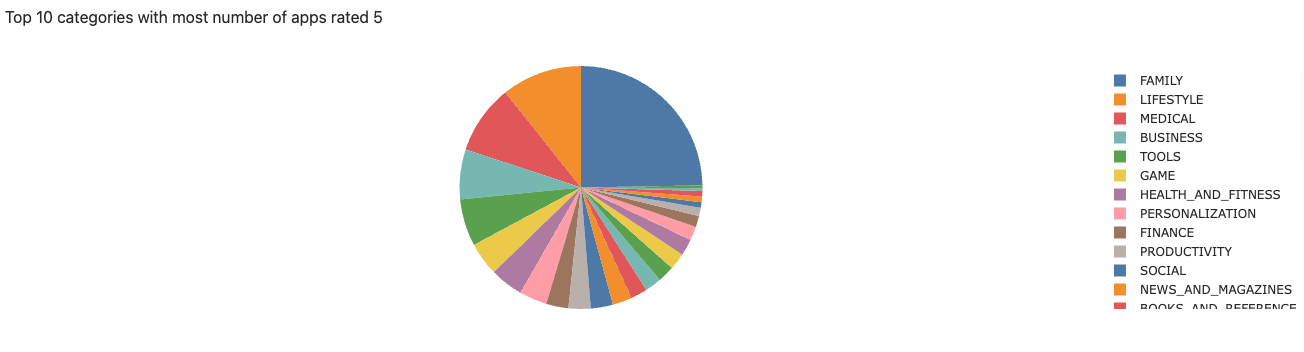

In [8]:
session.widget

### Top 10 apps for each category

Since we are performing top 10 apps filtering for each category, it's only right that we classify `App` under `Category`. In this case, we create a multi-level hierarchy such as the following:

In [9]:
h["App Categories"] = [l["Category"], l["App"]]
h

{('playstore', 'Android Ver'): <atoti.hierarchy.Hierarchy object at 0x13e98a590>, ('playstore', 'Type'): <atoti.hierarchy.Hierarchy object at 0x13e98a6e0>, ('playstore', 'Content Rating'): <atoti.hierarchy.Hierarchy object at 0x13e98a7d0>, ('playstore', 'Current Ver'): <atoti.hierarchy.Hierarchy object at 0x13e98a8c0>, ('playstore', 'Last Updated'): <atoti.hierarchy.Hierarchy object at 0x13e98a9b0>, ('playstore', 'Genres'): <atoti.hierarchy.Hierarchy object at 0x13e98aaa0>, ('playstore', 'App'): <atoti.hierarchy.Hierarchy object at 0x13e98ab90>, ('playstore', 'Category'): <atoti.hierarchy.Hierarchy object at 0x13e98ac80>, ('playstore', 'App Categories'): <atoti.hierarchy.Hierarchy object at 0x13e98ad70>}

This structure allows us to select at which level we want to apply the top count on in a multilevel hierarchy from the Atoti editor.  
<img src="https://data.atoti.io/notebooks/topcount/filter_by_category.png" alt="Filter by level" width="30%">

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
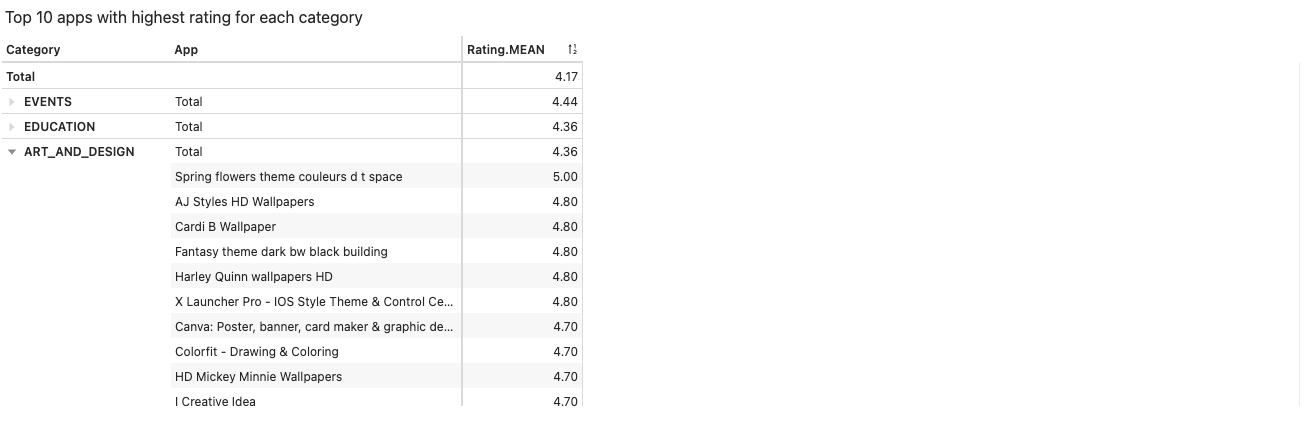

In [10]:
session.widget

#### Creating subplot to visualize top count per category

Again, go to the Atoti's Jupyterlab extension and add `Category` level to the subplot section.  
<img src="https://data.atoti.io/notebooks/topcount/atoti_subplot_controls.png" alt="create subplot" width="30%">

Slice the pie chart is by `Apps` and apply filter on `App` level of the `App Categories`

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
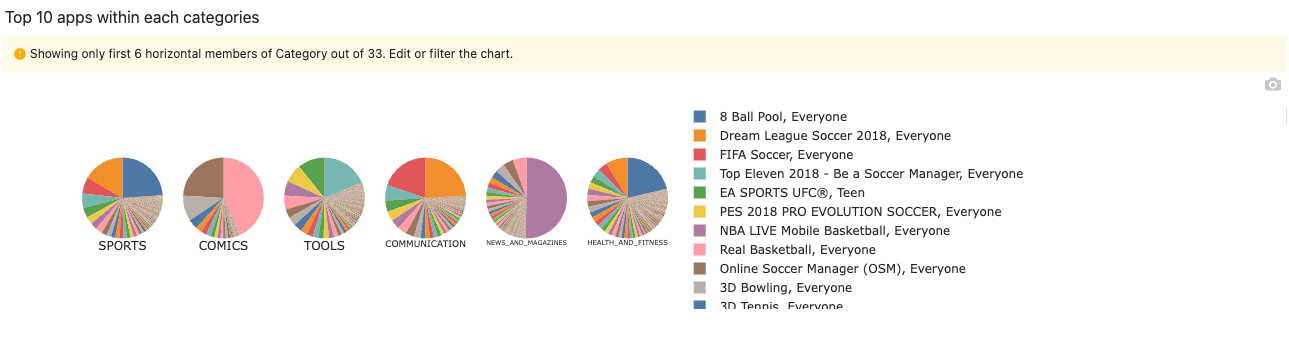

In [11]:
session.widget

You can use the filter to select the categories that you want to view. Alternative, use `session.link` to access the web application to build an interactive dashboard with quick filters. Check out the link below.

In [12]:
session.link / "#/dashboard/767"

http://localhost:55707/#/dashboard/767

_Note_: This is the session's local URL: it may not be reachable if Atoti is running on another machine.

<div style="text-align:center"><a href="https://www.atoti.io/?utm_source=gallery&utm_content=top-count-atoti" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/Your-turn-to-try-Atoti.jpg" alt="Atoti table" /></a></div>